***********************************************************
# **Citation requested: Rajen Bhatt, Abhinav Dhall, 'Skin Segmentation Dataset', UCI Machine Learning Repository**
***********************************************************

# **Importing of the 'basic' packages**

In [75]:
import numpy as np
import matplotlib as plt
import pandas as pd

# **Reading the dataset**

In [76]:
#upload of the dataset changing the names of the fields
df = pd.read_csv(r'Skin_NonSkin.txt', names= ["B", "R", "G", "skin"], sep='\t', header=None)

# **Data preparation**

# Some info on dataset and a small adjustment




In [77]:
df.head(10)

,B,R,G,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
5,69,80,118,1
6,70,81,119,1
7,70,81,119,1
8,76,87,125,1
9,76,87,125,1


In [78]:
df #info on the dataset

,B,R,G,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [79]:
df.skin = df.skin.replace([2], 0) #changing of the value '2'-->'0' in the field 'skin'

In [80]:
print(df)

          B    R    G  skin
0        74   85  123     1
1        73   84  122     1
2        72   83  121     1
3        70   81  119     1
4        70   81  119     1
...     ...  ...  ...   ...
245052  163  162  112     0
245053  163  162  112     0
245054  163  162  112     0
245055  163  162  112     0
245056  255  255  255     0

[245057 rows x 4 columns]


(array([194198.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  50859.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

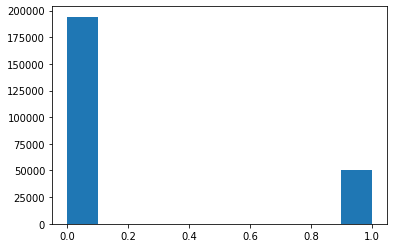

In [81]:
plt.pyplot.hist(df.skin)

# NaN check



In [82]:
df.isna().sum() #NaN

B       0
R       0
G       0
skin    0
dtype: int64

# **10-fold-CV**

In [83]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [84]:
df_copy = df.copy()

In [85]:
del df_copy['skin']

In [86]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier())
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_copy, df.skin, cv=10)
scores

array([0.81522892, 0.89492369, 0.95707174, 0.95947931, 0.97653636,
       0.97139476, 0.93279197, 0.9122628 , 0.92303612, 0.91287492])

In [87]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.05


# **Train/test set splitting e standardization**

In [88]:
print(df)

          B    R    G  skin
0        74   85  123     1
1        73   84  122     1
2        72   83  121     1
3        70   81  119     1
4        70   81  119     1
...     ...  ...  ...   ...
245052  163  162  112     0
245053  163  162  112     0
245054  163  162  112     0
245055  163  162  112     0
245056  255  255  255     0

[245057 rows x 4 columns]


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
skin = df.skin

In [91]:
print(skin)

0         1
1         1
2         1
3         1
4         1
         ..
245052    0
245053    0
245054    0
245055    0
245056    0
Name: skin, Length: 245057, dtype: int64


In [92]:
del df['skin']

In [93]:
print(df)

          B    R    G
0        74   85  123
1        73   84  122
2        72   83  121
3        70   81  119
4        70   81  119
...     ...  ...  ...
245052  163  162  112
245053  163  162  112
245054  163  162  112
245055  163  162  112
245056  255  255  255

[245057 rows x 3 columns]


In [94]:
#splitting the sample in training and test set
df_train, df_test, skin_train, skin_test = train_test_split(df, skin, test_size=0.25, random_state = 1313)
df_test

,B,R,G
69585,18,17,3
88494,76,81,36
240231,199,197,162
12680,57,110,173
202282,176,174,126
...,...,...,...
91922,35,36,10
30028,98,141,214
55058,19,16,1
147250,2,5,0


In [95]:
scaler = StandardScaler()
RGB_train = scaler.fit(df_train)
RGB_train = scaler.transform(df_train)
RGB_test = scaler.fit(df_test)
RGB_test = scaler.transform(df_test)

RGB_train, RGB_test

(array([[-1.30109567, -1.49283829, -1.24337155],
        [-0.9315899 , -1.07553371, -1.36741791],
        [ 0.24118927,  0.10961129, -0.48531047],
        ...,
        [-0.9797863 , -0.20754019,  0.85163362],
        [-0.8833935 , -0.99207279, -1.36741791],
        [-0.33716758,  0.04284256,  1.03081169]]),
 array([[-1.72271788, -1.92757308, -1.65422161],
        [-0.79152321, -0.86159576, -1.19959729],
        [ 1.18325171,  1.07048813,  0.53624103],
        ...,
        [-1.7066628 , -1.94422898, -1.6817746 ],
        [-1.97959917, -2.12744383, -1.6955511 ],
        [-0.6309724 , -0.77831629, -1.14449131]]))

In [96]:
import time

# **SGD**

# Estimation with **SGD** algorithm; loss functions: 'log', 'modified_huber', 'squared_hinge', 'perceptron'

In [97]:
tempi = np.empty((10,5))
scores = np.empty((10,5))
iter = np.empty((10,5))
loss_f = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']

for i in range(5):
 n = 0
 for n in range(10):
  clf = SGDClassifier(loss = loss_f[i], n_iter_no_change=2, tol=1e-2, alpha=0, early_stopping=True, learning_rate='constant', eta0 = 0.01)
  start = time.time()
  clf.fit(RGB_train, skin_train) #stima
  end = time.time()

 #tempi
  tempo = end - start
  tempi[n,i] = tempo

 #scores
  clf_score = clf.score(RGB_test, skin_test)
  scores[n,i] = clf_score

 #iterazioni
  iterazioni = clf.n_iter_
  iter[n,i] = iterazioni

In [98]:
number_of_iterations = pd.DataFrame(iter, columns = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
number_of_iterations

,hinge,log,modified_huber,squared_hinge,perceptron
0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0
2,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0
5,3.0,3.0,3.0,3.0,3.0
6,3.0,3.0,3.0,3.0,3.0
7,3.0,3.0,3.0,3.0,3.0
8,3.0,3.0,3.0,3.0,3.0
9,3.0,3.0,3.0,3.0,3.0


In [99]:
mean_times_to_estimation = np.mean(tempi, axis=0)
mean_times_to_estimation = pd.DataFrame(mean_times_to_estimation, columns = ['Mean of time to estimate (seconds)'], index=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
mean_times_to_estimation

,Mean of time to estimate (seconds)
hinge,0.297106
log,0.331222
modified_huber,0.303331
squared_hinge,0.301225
perceptron,0.295557


In [100]:
mean_scores = np.mean(scores, axis=0)
mean_scores = pd.DataFrame(mean_scores, columns = ['Mean scores'], index=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
mean_scores

,Mean scores
hinge,0.929026
log,0.919724
modified_huber,0.920958
squared_hinge,0.920124
perceptron,0.865176


In [101]:
mean_number_iterations = np.mean(iter, axis=0)
mean_number_iterations = pd.DataFrame(mean_number_iterations, columns = ['Mean number of iterations'], index=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])
mean_number_iterations

,Mean number of iterations
hinge,3.0
log,3.0
modified_huber,3.0
squared_hinge,3.0
perceptron,3.0


# **Logistic Regression**

In [102]:
from sklearn.linear_model import LogisticRegression

# Estimation with **SAG, SAGA** and **LGBFS** algorithms; loss function: 'log'

In [103]:
tempi = np.empty((10,3))
scores = np.empty((10,3))
iter = np.empty((10,3))
alg = ['saga', 'sag', 'lbfgs']

for i in range(3):
 n = 0
 for n in range(10):
  clf2 = LogisticRegression(solver=alg[i], max_iter = 1000)
  start = time.time()
  clf2.fit(df_train, skin_train) #stima
  end = time.time()

 #tempi
  tempo = end - start
  tempi[n,i] = tempo

 #scores
  clf2_score = clf2.score(df_test, skin_test)
  scores[n,i] = clf2_score

 #iterazioni
  iterazioni = clf2.n_iter_
  iter[n,i] = iterazioni

In [104]:
mean_times_to_estimation = np.mean(tempi, axis=0)
mean_times_to_estimation = pd.DataFrame(mean_times_to_estimation, columns = ['Mean of time to estimate (seconds)'], index=['saga', 'sag', 'lbfgs'])
mean_times_to_estimation

,Mean of time to estimate (seconds)
saga,19.430091
sag,10.571890
lbfgs,1.009877


In [105]:
mean_scores = np.mean(scores, axis=0)
mean_scores = pd.DataFrame(mean_scores, columns = ['Mean scores'], index=['saga', 'sag', 'lbfgs'])
mean_scores

,Mean scores
saga,0.919737
sag,0.919466
lbfgs,0.919301


In [106]:
mean_number_iterations_log = np.mean(iter, axis=0)
mean_number_iterations_log = pd.DataFrame(mean_number_iterations_log, columns = ['Mean number of iterations'], index=['saga', 'sag', 'lbfgs'])
mean_number_iterations_log

,Mean number of iterations
saga,322.3
sag,193.3
lbfgs,34.0


(Another possible way to view results)

In [ ]:
print(tempi)
print(    )
print(scores)
print(    )
print(iter)
print(    )
print("*********************************************************************************")
print("                                    MEANS                                        ")
print("*********************************************************************************")
print(    )
print("%0.2f seconds with a standard deviation of %0.2f" % (tempi.mean(), tempi.std()))
print(    )
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(    )
print("%0.2f iterations with a standard deviation of %0.2f" % (iter.mean(), iter.std()))

[[18.08888888 16.89273024  1.00365686]
 [19.67260337 13.19171214  0.9721911 ]
 [19.61519265 13.16455817  0.9852128 ]
 [19.98948193 13.1608429   0.96390033]
 [20.51933146 14.14495468  0.97710752]
 [17.79450059 13.08060026  0.95501733]
 [17.01278448 24.3855834   0.95825219]
 [21.0840385  14.67135143  0.95157266]
 [23.74378157 12.71182084  0.97406507]
 [26.35710835 11.95517182  0.95864654]]

[[0.91966049 0.91948094 0.9193014 ]
 [0.91982372 0.91946462 0.9193014 ]
 [0.91962785 0.91946462 0.9193014 ]
 [0.91962785 0.91948094 0.9193014 ]
 [0.91962785 0.91948094 0.9193014 ]
 [0.91962785 0.91946462 0.9193014 ]
 [0.91962785 0.91948094 0.9193014 ]
 [0.91966049 0.91948094 0.9193014 ]
 [0.91982372 0.91946462 0.9193014 ]
 [0.91966049 0.91946462 0.9193014 ]]

[[327. 195.  34.]
 [317. 194.  34.]
 [328. 190.  34.]
 [329. 195.  34.]
 [332. 196.  34.]
 [331. 193.  34.]
 [331. 196.  34.]
 [324. 195.  34.]
 [320. 191.  34.]
 [325. 189.  34.]]

****************************************************************

# **Interesting facts**


The objective of my implementation was to practically confirm that SGD algorithms are **"particularly suitable for large scale applications"** (Zhang, 2004). I took in considerations three different perspectives:

1. the score with all the loss function;
2. the number of iterations (for all the loss functions);
3. the time to estimate.

For all those three points my results confirm the effectiveness of SGD on large scale problems.

One can also compare the performances of SGD with respect of SAGA, SAG and LBFGS. In particular, I showed that, even if all the three algorithms that I just mentioned are good for large datasets because they are fast (as said here --> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) **SGD has very better performance in terms of number of iterations and time to estimate.**

In order to tune parameters of SGD I followed the indications of Zhang (2004):
- I choosed to set the regularization term to 0 because even without it the algorithm has an implicit regularization effect;
- "instead of considering complicated schemes for choosing learning rate, we may simply fix it to a predetermined small constant, and then run the SGD until satisfactory convergence is achieved";
- 
Il parametro ’early-stopping’,
impostato come ’True’, fa si che l’algoritmo si fermi quando la differenza
tra la miglior perdita raggiunta e la perdita raggiunta fino a quel momen-
to è maggiore della soglia di tolleranza, che ho impostato essere molto
bassa

In [107]:
#creation of a unique dataframe to view results on a histogram
iterations_comparison = pd.merge(mean_number_iterations, mean_number_iterations_log, how='outer')
iterations_comparison = iterations_comparison.set_axis(['SGD(hinge)', 'SGD(log)', 'SGD(modified_huber)', 'SGD(squared_hinge)', 'SGD(perceptron)', 'SAGA(log)', 'SAG(log)', 'LBGFS(log)'], axis='index')
iterations_comparison            

,Mean number of iterations
SGD(hinge),3.0
SGD(log),3.0
SGD(modified_huber),3.0
SGD(squared_hinge),3.0
SGD(perceptron),3.0
SAGA(log),322.3
SAG(log),193.3
LBGFS(log),34.0


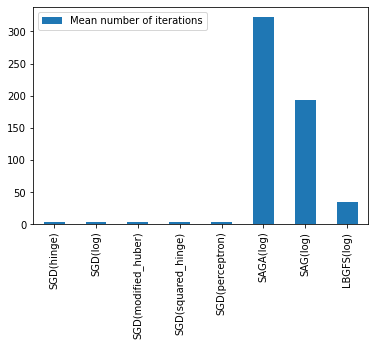

In [108]:
iterations_comparison.plot.bar()